# Analysis

In [1]:
# importing relevant packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression
# # removing warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
import analysis

In [3]:
# optional code to install package to use .feather file format
# !pip install pyarrow

###### C.J. Percival OH-NO Rate Constants

In [4]:
# Reading in only the necessary page of the rate calculations spreadsheet
temp_dependant_rates = pd.read_excel('Temp dependant rate calculations.xlsx', sheet_name='Final data')

## Reading in Data

In [5]:
#2005
df_allk05 = analysis.read_data_analysis('all k',2005,temp_dependant_rates)
df_29805 = analysis.read_data_analysis('298-258 k',2005,temp_dependant_rates)
df_floatf05 = analysis.read_data_analysis('float f k',2005,temp_dependant_rates)
df_floatm05 = analysis.read_data_analysis('float m k',2005,temp_dependant_rates)
df_lit05 = analysis.read_data_analysis('literature k',2005,temp_dependant_rates)

In [6]:
#2010
df_allk10 = analysis.read_data_analysis('all k',2010,temp_dependant_rates)
df_29810 = analysis.read_data_analysis('298-258 k',2010,temp_dependant_rates)
df_floatf10 = analysis.read_data_analysis('float f k',2010,temp_dependant_rates)
df_floatm10 = analysis.read_data_analysis('float m k',2010,temp_dependant_rates)
df_lit10 = analysis.read_data_analysis('literature k',2010,temp_dependant_rates)

In [7]:
#2020
df_allk20 = analysis.read_data_analysis('all k',2020,temp_dependant_rates)
df_29820 = analysis.read_data_analysis('298-258 k',2020,temp_dependant_rates)
df_floatf20 = analysis.read_data_analysis('float f k',2020,temp_dependant_rates)
df_floatm20 = analysis.read_data_analysis('float m k',2020,temp_dependant_rates)
df_lit20 = analysis.read_data_analysis('literature k',2020,temp_dependant_rates)

In [8]:
df_2005 = pd.concat([df_allk05, df_floatf05, df_floatm05, df_29805, df_lit05])

In [9]:
df_2010 = pd.concat([df_allk10, df_floatf10, df_floatm10, df_29810, df_lit10])

In [10]:
df_2020 = pd.concat([df_allk20, df_floatf20, df_floatm20, df_29820, df_lit20])

## Trend Analysis

In [11]:
# grouped
# year averages
yearly_2005 = analysis.average(df_2005, 'year',format_type='grouped')
yearly_2010 = analysis.average(df_2010,'year',format_type='grouped')
yearly_2020 = analysis.average(df_2020,'year',format_type='grouped')
# month averages
monthly_2005 = analysis.average(df_2005,'month',format_type='grouped')
monthly_2010 = analysis.average(df_2010,'month',format_type='grouped')
monthly_2020 = analysis.average(df_2020,'month',format_type='grouped')
# day-month averages
daily_2005 = analysis.average(df_2005,'day',format_type='grouped')
daily_2010 = analysis.average(df_2010,'day',format_type='grouped')
daily_2020 = analysis.average(df_2020,'day',format_type='grouped')
# hour-month averages
hourly_2005 = analysis.average(df_2005,'hour',format_type='grouped')
hourly_2010 = analysis.average(df_2010,'hour',format_type='grouped')
hourly_2020 = analysis.average(df_2020,'hour',format_type='grouped')

In [12]:
# continous
monthly_2005_cont = analysis.average(df_2005, 'month', format_type = 'continuous')
monthly_2010_cont = analysis.average(df_2010, 'month', format_type = 'continuous')
monthly_2020_cont = analysis.average(df_2020, 'month', format_type = 'continuous')

daily_2005_cont = analysis.average(df_2005, 'day', format_type = 'continuous')
daily_2010_cont = analysis.average(df_2010, 'day', format_type = 'continuous')
daily_2020_cont = analysis.average(df_2020, 'day', format_type = 'continuous')

### Analysis of Literature Rate Constant
##### Section 3.1 The Literature OH Trends

#### Yearly Averages
__*Table 6*__

In [13]:
# filtering to include only values of the literature rate constant
yearly_2005_lit = yearly_2005[yearly_2005['rate type'] == 'literature k']
yearly_2010_lit = yearly_2010[yearly_2010['rate type'] == 'literature k']
yearly_2020_lit = yearly_2020[yearly_2020['rate type'] == 'literature k']

In [14]:
# generating a dataframe of yearly averages
year_averages = pd.DataFrame({'Year': ['2005','2010','2020'],
                             'lit OH average / molecules cm-3': [yearly_2005_lit['OH concentration'].mean(), 
                                                         yearly_2010_lit['OH concentration'].mean(),
                                                         yearly_2020_lit['OH concentration'].mean()]})

In [15]:
year_averages

,Year,lit OH average / molecules cm-3
0,2005,174376.867355
1,2010,268153.910664
2,2020,878162.585666


#### Monthly Averages
__*Figure 8*__

Text(0.5, 0.92, 'The Daily and Monthly Average OH Concentration per Year')

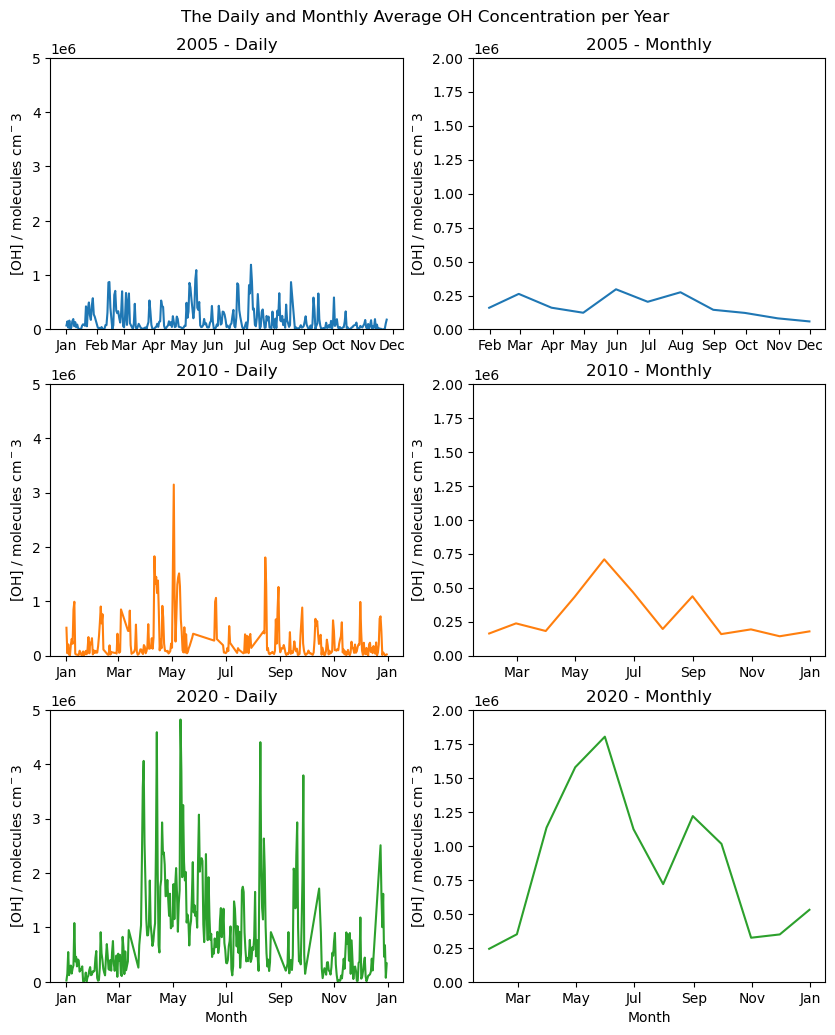

In [16]:
# plot of daily averages for each year for the literature rate constant
fig,ax = plt.subplots(3,2, figsize=(10,12))

# seaborn lineplot of date against OH concentration
    # errorbar = None (no error plots)
# 2005
sns.lineplot(data=daily_2005_cont[daily_2005_cont['rate type'] == 'literature k'],x='Date_Time',y='OH concentration', color='tab:blue', errorbar=None,ax=ax[0,0])
sns.lineplot(data=monthly_2005_cont[monthly_2005_cont['rate type'] == 'literature k'],x='Date_Time',y='OH concentration', color='tab:blue', ax=ax[0,1])
# 2010
sns.lineplot(data=daily_2010_cont[daily_2010_cont['rate type'] == 'literature k'],x='Date_Time',y='OH concentration', color = 'tab:orange',errorbar=None,ax=ax[1,0])
sns.lineplot(data=monthly_2010_cont[monthly_2010_cont['rate type'] == 'literature k'],x='Date_Time',y='OH concentration', color='tab:orange',ax=ax[1,1])
# 2020
sns.lineplot(data=daily_2020_cont[daily_2020_cont['rate type'] == 'literature k'],x='Date_Time',y='OH concentration', color = 'tab:green', errorbar=None,ax=ax[2,0])
sns.lineplot(data=monthly_2020_cont[monthly_2020_cont['rate type'] == 'literature k'],x='Date_Time',y='OH concentration', color='tab:green', ax=ax[2,1])

# # formatting x axis to only show the month
ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax[2,1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# formatting x axis
ax[0,0].set_xlabel('')
ax[1,0].set_xlabel('')
ax[2,0].set_xlabel('Month')
ax[0,1].set_xlabel('')
ax[1,1].set_xlabel('')
ax[2,1].set_xlabel('Month')
# formatting y axis
ax[0,0].set_ylabel('[OH] / molecules cm$^-3$')
ax[1,0].set_ylabel('[OH] / molecules cm$^-3$')
ax[2,0].set_ylabel('[OH] / molecules cm$^-3$')
ax[0,1].set_ylabel('[OH] / molecules cm$^-3$')
ax[1,1].set_ylabel('[OH] / molecules cm$^-3$')
ax[2,1].set_ylabel('[OH] / molecules cm$^-3$')

# setting y lim so axis same size
ax[0,0].set_ylim(0.0e6, 5e6)
ax[1,0].set_ylim(0.0e6, 5e6)
ax[2,0].set_ylim(0.0e6, 5e6)
ax[0,1].set_ylim(0.0e6, 2e6)
ax[1,1].set_ylim(0.0e6, 2e6)
ax[2,1].set_ylim(0.0e6, 2e6)

# adding plot titles
ax[0,0].set_title('2005 - Daily')
ax[1,0].set_title('2010 - Daily')
ax[2,0].set_title('2020 - Daily')
ax[0,1].set_title('2005 - Monthly')
ax[1,1].set_title('2010 - Monthly')
ax[2,1].set_title('2020 - Monthly')

fig.suptitle('The Daily and Monthly Average OH Concentration per Year', y=0.92)

#### Pollution Composition
__*Figure 9*__

In [17]:
# List of yearly average of each species of interest
av20 = list(daily_2020[['Ozone','Nitric oxide','Nitrogen dioxide',
                   'NMVOC sum','methane','Carbon monoxide']].mean())
av10 = list(daily_2010[['Ozone','Nitric oxide','Nitrogen dioxide',
                   'NMVOC sum','methane','Carbon monoxide']].mean())
av05 = list(daily_2005[['Ozone','Nitric oxide','Nitrogen dioxide',
                   'NMVOC sum','methane','Carbon monoxide']].mean())
column_list = ['Ozone','Nitric oxide','Nitrogen dioxide',
                   'NMVOC sum','methane','Carbon monoxide']

In [18]:
# dataframe of yearly averages of each species of interest
avdict = dict({'2005': av05, '2010':av10, '2020':av20})

avdf = (pd.DataFrame(avdict)).T
avdf.columns = column_list

In [19]:
# dataframe of yearly averages of OH concentration
avdf_OH = pd.DataFrame(dict({'year':[2005,2010,2020],
               'OH mean':[daily_2005['OH concentration'].mean(), daily_2010['OH concentration'].mean(),
                         daily_2020['OH concentration'].mean()]}))

In [20]:
# dataframe of yearly averages of NMVOC/NOx ratio
avdf_NOVOC = pd.DataFrame(dict({'year':[2005,2010,2020],
               'NMVOC/NOx mean':[daily_2005['NMVOC/NOx ratio'].mean(), daily_2010['NMVOC/NOx ratio'].mean(),
                         daily_2020['NMVOC/NOx ratio'].mean()]}))

Text(0.5, 0.98, 'The Concentration of Pollutant Species for 2005, 2010 and 2020')

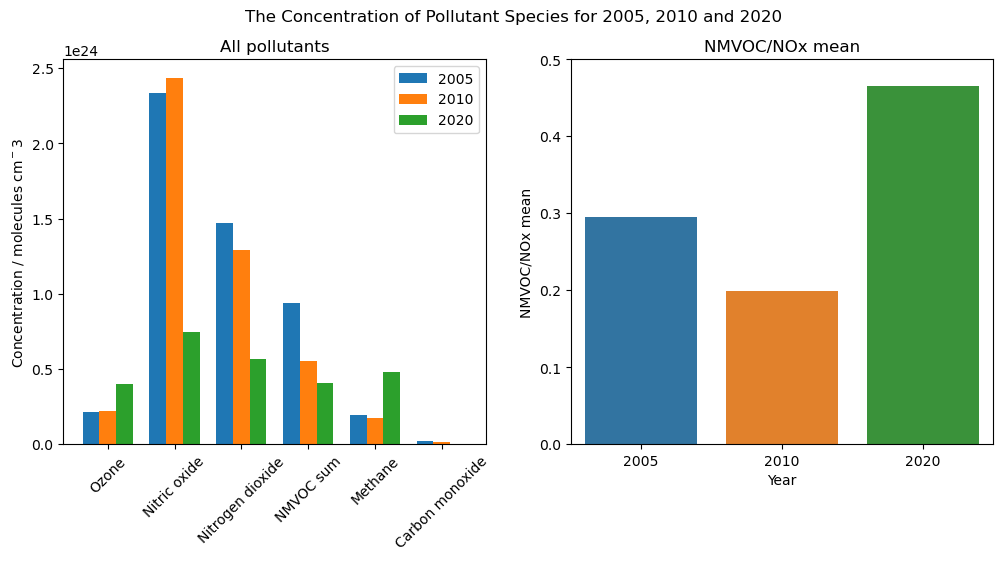

In [21]:
x = np.arange(len(column_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(1,2,figsize=(12,5)) # figure initialisation

# plotting bar chart
for year, species_mean in avdict.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, species_mean, width,label=year)
    multiplier += 1
        
sns.barplot(data=avdf_NOVOC,x='year',y='NMVOC/NOx mean', ax=ax[1])

# formatting x labels
ax[0].set_xticks(x + width, ['Ozone','Nitric oxide','Nitrogen dioxide','NMVOC sum','Methane','Carbon monoxide'],rotation=45)
ax[1].set_xlabel('Year')
# formatting y labels
ax[0].set_ylabel('Concentration / molecules cm$^-3$')
ax[1].set_ylim(0,0.5)
# adding legend
ax[0].legend()

# titles
ax[0].set_title('All pollutants')
ax[1].set_title('NMVOC/NOx mean')
fig.suptitle('The Concentration of Pollutant Species for 2005, 2010 and 2020')

#### Total NOx
__*Table 7*__

In [22]:
# Selecting certain temperature as NOx emission will be the same at every temp (measured species)
df_200_05 = df_lit05[df_lit05['Temperature'] == 200]
df_200_10 = df_lit10[df_lit10['Temperature'] == 200]
df_200_20 = df_lit20[df_lit20['Temperature'] == 200]

In [23]:
# finding the NO, NO2, NOx mean
NOx_2005 = pd.DataFrame(df_200_05[['Nitric oxide','Nitrogen dioxide','NOx']].mean())
NOx_2010 = pd.DataFrame(df_200_10[['Nitric oxide','Nitrogen dioxide','NOx']].mean())
NOx_2020 = pd.DataFrame(df_200_20[['Nitric oxide','Nitrogen dioxide','NOx']].mean())
# combining into a single dataframe
yearly_NOx = pd.concat([NOx_2005, NOx_2010, NOx_2020],axis=1)
# assigning columns
yearly_NOx.columns = ['2005','2010','2020']

In [24]:
yearly_NOx

,2005,2010,2020
Nitric oxide,2.319830e+24,2.422258e+24,7.450371e+23
Nitrogen dioxide,1.462062e+24,1.282942e+24,5.651312e+23
NOx,3.781892e+24,3.705200e+24,1.310168e+24


#### Variability of OH concentration and NMVOC/NOx ratio
__*Figure 10 and Figure 11*__

Text(0.5, 0.98, 'Box plots of the OH concentration for 2005, 2010 and 2020')

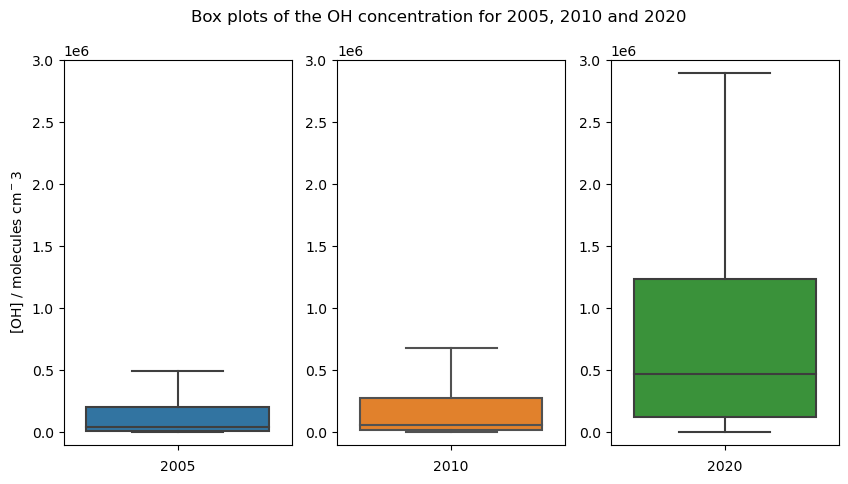

In [25]:
# boxplot of OH concentration
fig,ax = plt.subplots(1,3, figsize=(10,5))

sns.boxplot(y=df_lit05['OH concentration'],showfliers=False, color='tab:blue',ax=ax[0])
sns.boxplot(y=df_lit10['OH concentration'],showfliers=False, color='tab:orange',ax=ax[1])
sns.boxplot(y=df_lit20['OH concentration'],showfliers=False, color='tab:green',ax=ax[2])

# formatting y axis
ax[0].set_ylabel('[OH] / molecules cm$^-3$')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
# foratting x axis
ax[0].set_xlabel('2005')
ax[1].set_xlabel('2010')
ax[2].set_xlabel('2020')

# setting y limits for comparability
ax[0].set_ylim(-0.1e6,3e6)
ax[1].set_ylim(-0.1e6,3e6)
ax[2].set_ylim(-0.1e6,3e6)

fig.suptitle('Box plots of the OH concentration for 2005, 2010 and 2020')

Text(0.5, 0.98, 'Box plots of the NMVOC/NOx ratio for 2005, 2010 and 2020')

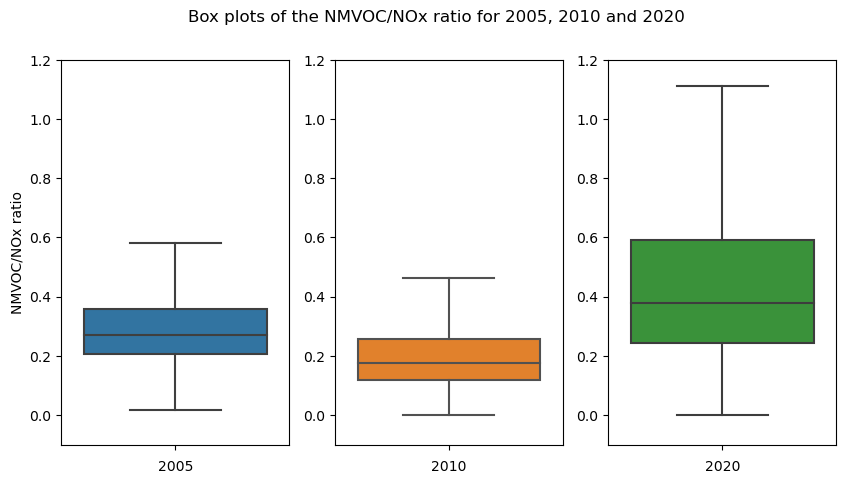

In [26]:
# boxplot of NMVOC/NOx ratio
fig,ax = plt.subplots(1,3, figsize=(10,5))

sns.boxplot(y=df_lit05['NMVOC/NOx ratio'],showfliers=False, color='tab:blue',ax=ax[0])
sns.boxplot(y=df_lit10['NMVOC/NOx ratio'],showfliers=False, color='tab:orange',ax=ax[1])
sns.boxplot(y=df_lit20['NMVOC/NOx ratio'],showfliers=False, color='tab:green',ax=ax[2])

# formatting y axis
ax[0].set_ylabel('NMVOC/NOx ratio')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
# formatting x axis
ax[0].set_xlabel('2005')
ax[1].set_xlabel('2010')
ax[2].set_xlabel('2020')

# setting y limits for comparability
ax[0].set_ylim(-0.1,1.2)
ax[1].set_ylim(-0.1,1.2)
ax[2].set_ylim(-0.1,1.2)

fig.suptitle('Box plots of the NMVOC/NOx ratio for 2005, 2010 and 2020')

### Analysis of the Impact of New Rate Constants
##### Section 3.2 The Impact of the New OH-NO Rate Constants on OH Trends

#### Percentage change from literature
__*Figure 12*__

In [27]:
# monthly percentage changes
monthly_2005_OH = analysis.OH_percentage_change(monthly_2005, df_2005, 'month', temp_dependant_rates)
monthly_2010_OH = analysis.OH_percentage_change(monthly_2010,df_2010, 'month', temp_dependant_rates)
monthly_2020_OH = analysis.OH_percentage_change(monthly_2020, df_2020, 'month', temp_dependant_rates)

In [28]:
# daily percentage changes
daily_2005_OH = analysis.OH_percentage_change(daily_2005, df_2005, 'day', temp_dependant_rates)
daily_2010_OH = analysis.OH_percentage_change(daily_2010,df_2010, 'day', temp_dependant_rates)
daily_2020_OH = analysis.OH_percentage_change(daily_2020, df_2020, 'day', temp_dependant_rates)

Text(0.5, 0.93, 'The Percentage Change in [OH] From the Literature Monthly Averages')

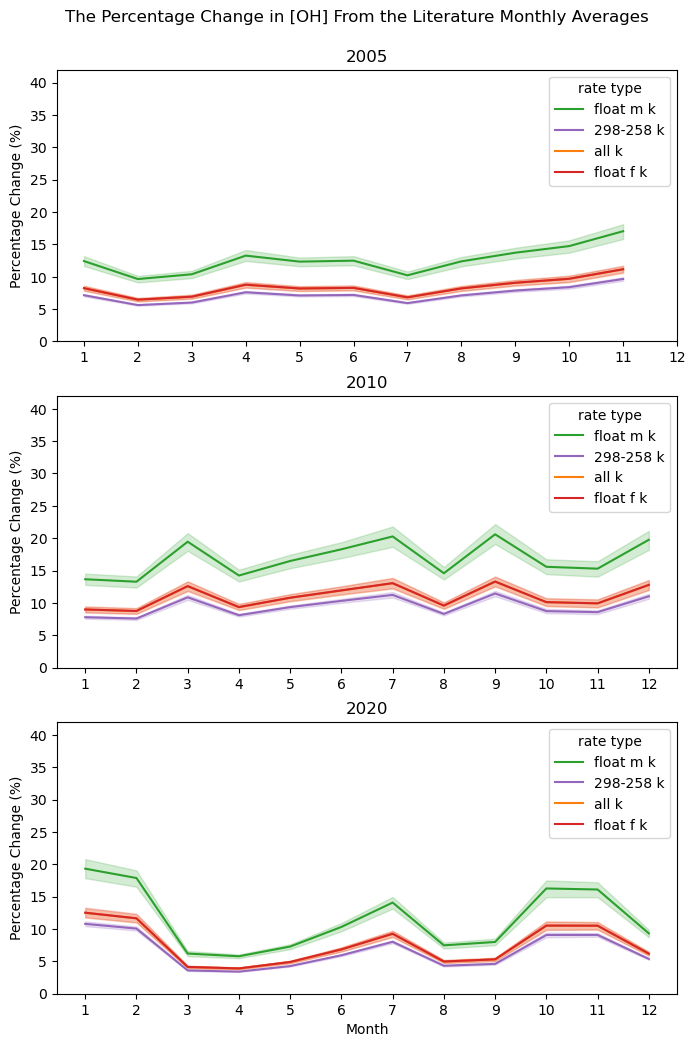

In [29]:
# plot of the percentage change from literature per each rate constant for the monthly averaged data
fig,ax = plt.subplots(3,figsize=(8,12))

# defining a palette
rate_type_palette = {
    'literature': 'tab:blue',
    'all k': 'tab:orange',
    'float m k': 'tab:green',
    'float f k': 'tab:red',
    '298-258 k': 'tab:purple'
}

# 2005
sns.lineplot(data=monthly_2005_OH,x='month', y='OH percentage change', hue='rate type', palette=rate_type_palette, ax=ax[0])
# 2010
sns.lineplot(data=monthly_2010_OH,x='month', y='OH percentage change', hue='rate type', palette=rate_type_palette, ax=ax[1])
# 2020
sns.lineplot(data=monthly_2020_OH,x='month', y='OH percentage change', hue='rate type', palette=rate_type_palette, ax=ax[2])

# formatting y axis
ax[0].set_ylim(0, 42)
ax[1].set_ylim(0, 42)
ax[2].set_ylim(0, 42)
ax[0].set_ylabel('Percentage Change (%)')
ax[1].set_ylabel('Percentage Change (%)')
ax[2].set_ylabel('Percentage Change (%)')
#formatting x axis
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Month')
ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax[1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax[2].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# adding plot titles
ax[0].set_title('2005')
ax[1].set_title('2010')
ax[2].set_title('2020')

fig.suptitle('The Percentage Change in [OH] From the Literature Monthly Averages', y=0.93)

#### New Rate Constants (C.J. Percival)
__*Figure 13*__

In [30]:
temp_dependant_rates

,Temperature (K),literature k,all k,float m k,float f k,298-258 k
0,300,9.520674e-12,7.097912e-12,6.234063e-12,7.091856e-12,7.254576e-12
1,290,9.212528e-12,6.749877e-12,5.778281e-12,6.744102e-12,6.940892e-12
2,280,8.901756e-12,6.401413e-12,5.339922e-12,6.395937e-12,6.625714e-12
3,270,8.588341e-12,6.052617e-12,4.919056e-12,6.047458e-12,6.309022e-12
4,260,8.272269e-12,5.703694e-12,4.515698e-12,5.698869e-12,5.990855e-12
5,250,7.953534e-12,5.354976e-12,4.129811e-12,5.350499e-12,5.671328e-12
6,240,7.632139e-12,5.006943e-12,3.761317e-12,5.002825e-12,5.350645e-12
7,230,7.308096e-12,4.660237e-12,3.410101e-12,4.656485e-12,5.029116e-12
8,220,6.981428e-12,4.315677e-12,3.076032e-12,4.312290e-12,4.707175e-12
9,210,6.652176e-12,3.974258e-12,2.758976e-12,3.971231e-12,4.385391e-12


Text(0.5, 1.0, 'OH-NO Rate Constant Values from 200-300 K')

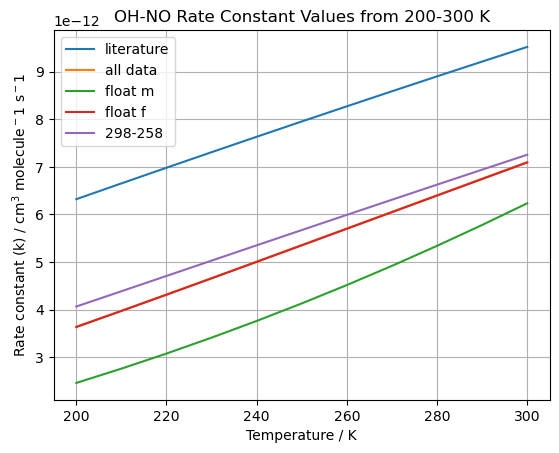

In [31]:
# Plotting the rate constant values against temperature
fig,ax = plt.subplots()

# plotting each rate constant line
sns.lineplot(data=temp_dependant_rates, x = 'Temperature (K)', y = 'literature k', label = 'literature', ax=ax)
sns.lineplot(data=temp_dependant_rates, x = 'Temperature (K)', y = 'all k', label = 'all data', ax=ax)
sns.lineplot(data=temp_dependant_rates, x = 'Temperature (K)', y = 'float m k', label = 'float m', ax=ax)
sns.lineplot(data=temp_dependant_rates, x = 'Temperature (K)', y = 'float f k', label = 'float f', ax=ax)
sns.lineplot(data=temp_dependant_rates, x = 'Temperature (K)', y = '298-258 k', label = '298-258', ax=ax)

# plot formatting
ax.grid()
ax.legend()
# plot titles
ax.set_ylabel('Rate constant (k) / cm$^3$ molecule$^-1$ s$^-1$')
ax.set_xlabel('Temperature / K')
ax.set_title('OH-NO Rate Constant Values from 200-300 K')

#### Average OH Concentration and Percentage Change From Literature with Temperature
__*Figure 14*__

In [32]:
# generating dataframe with mean OH and mean percentage change from literature
df_2005_perc_mean = analysis.calculate_OH_percentage_mean(daily_2005_OH)
df_2010_perc_mean = analysis.calculate_OH_percentage_mean(daily_2010_OH)
df_2020_perc_mean = analysis.calculate_OH_percentage_mean(daily_2020_OH)

Text(0.5, 0.92, 'The Average OH concentration and Percentage Change from Literature')

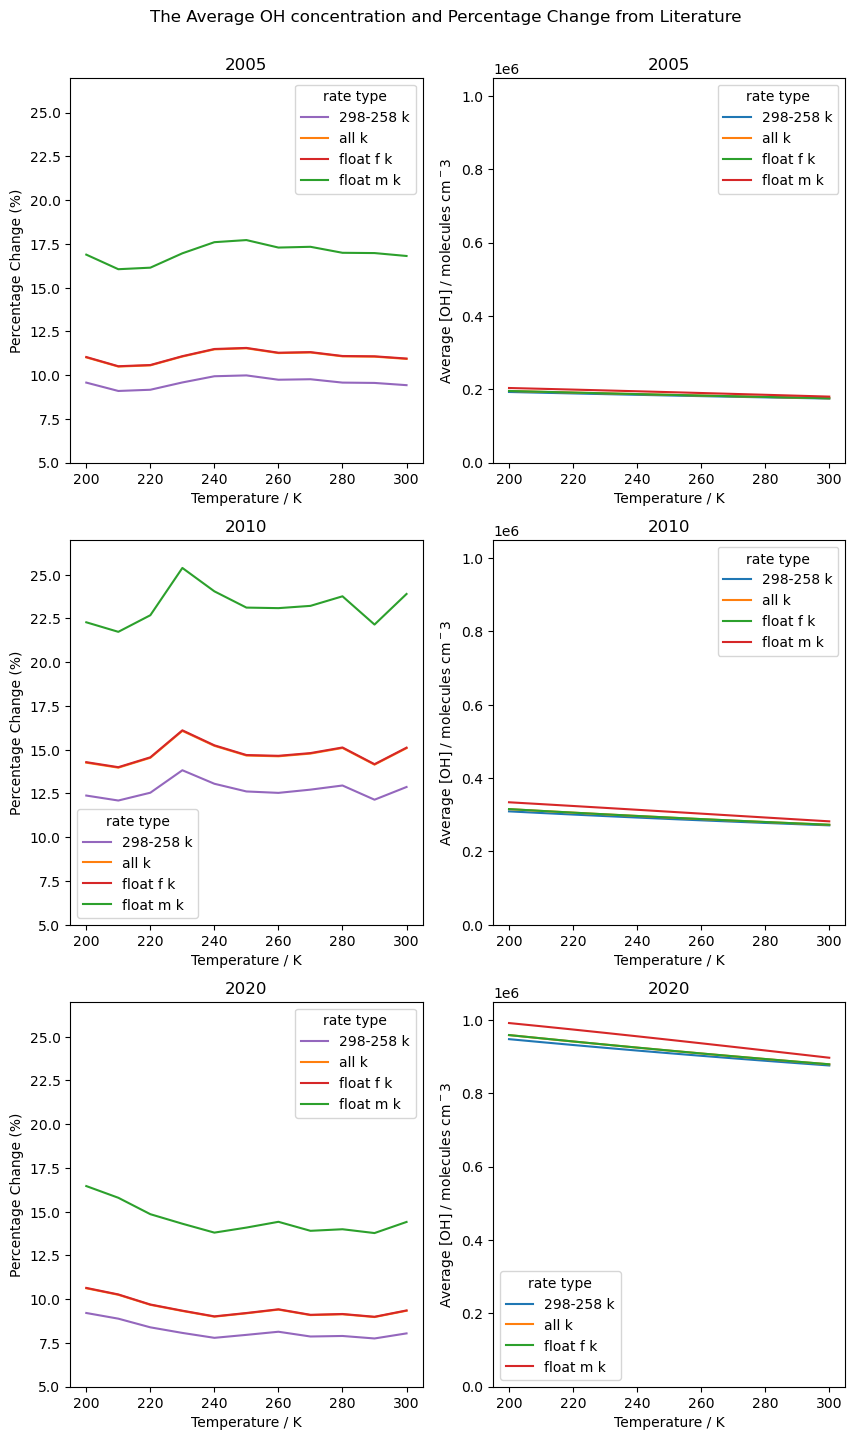

In [33]:
# plot of OH percentage change and mean over temperature range
fig,ax = plt.subplots(3,2, figsize=(10,17))

# 2005
sns.lineplot(data=df_2005_perc_mean, x='temperature', y='% change in OH mean', hue='rate type', palette=rate_type_palette,  ax=ax[0,0])
sns.lineplot(data=df_2005_perc_mean, x='temperature', y='mean OH', hue='rate type', ax=ax[0,1])
# 2010
sns.lineplot(data=df_2010_perc_mean, x='temperature', y='% change in OH mean', hue='rate type', palette=rate_type_palette, ax=ax[1,0])
sns.lineplot(data=df_2010_perc_mean, x='temperature', y='mean OH', hue='rate type', ax=ax[1,1])
# 2020
sns.lineplot(data=df_2020_perc_mean, x='temperature', y='% change in OH mean', hue='rate type', palette=rate_type_palette, ax=ax[2,0])
sns.lineplot(data=df_2020_perc_mean, x='temperature', y='mean OH', hue='rate type', ax=ax[2,1])

# formatting titles and labels - 2005
ax[0,0].set_title('2005')
ax[0,1].set_title('2005')
ax[0,0].set_xlabel('Temperature / K')
ax[0,0].set_ylabel('Percentage Change (%)')
ax[0,1].set_xlabel('Temperature / K')
ax[0,1].set_ylabel('Average [OH] / molecules cm$^-3$')
# formatting titles and labels - 2010
ax[1,0].set_title('2010')
ax[1,1].set_title('2010')
ax[1,0].set_xlabel('Temperature / K')
ax[1,0].set_ylabel('Percentage Change (%)')
ax[1,1].set_xlabel('Temperature / K')
ax[1,1].set_ylabel('Average [OH] / molecules cm$^-3$')
# formatting titles and labels - 2020
ax[2,0].set_title('2020')
ax[2,1].set_title('2020')
ax[2,0].set_xlabel('Temperature / K')
ax[2,0].set_ylabel('Percentage Change (%)')
ax[2,1].set_xlabel('Temperature / K')
ax[2,1].set_ylabel('Average [OH] / molecules cm$^-3$')

# setting consistant y axis values
ax[0,1].set_ylim(0.0e5,10.5e5)
ax[1,1].set_ylim(0.0e5,10.5e5)
ax[2,1].set_ylim(0.0e5,10.5e5)
ax[0,0].set_ylim(5,27)
ax[1,0].set_ylim(5,27)
ax[2,0].set_ylim(5,27)
# formatting the y axis ticks to be in scientific notation
ax[0,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[2,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

fig.suptitle('The Average OH concentration and Percentage Change from Literature', y=0.92)

#### Temperature Dependancy of the Rate Constants: Linear Regression
__*Figure 15 and Table 8*__

In [34]:
# specifying X variable
X = temp_dependant_rates['Temperature (K)'].values.reshape(-1,1)

# y variable: literature k
y_litk = temp_dependant_rates['literature k'].values.reshape(-1,1)
model_litk=LinearRegression()
model_litk.fit(X,y_litk)

# y variable: all k
y_allk = temp_dependant_rates['all k'].values.reshape(-1,1)
model_allk=LinearRegression()
model_allk.fit(X,y_allk)

# y variable: float m k
y_floatmk = temp_dependant_rates['float m k'].values.reshape(-1,1)
model_floatmk=LinearRegression()
model_floatmk.fit(X,y_floatmk)

# y variable: float f k
y_floatfk = temp_dependant_rates['float f k'].values.reshape(-1,1)
model_floatfk=LinearRegression()
model_floatfk.fit(X,y_floatfk)

# y variable: 298-258 k
y_298k = temp_dependant_rates['298-258 k'].values.reshape(-1,1)
model_298k=LinearRegression()
model_298k.fit(X,y_298k)

LinearRegression()

In [35]:
# R2 score
r2_score_list = [model_litk.score(X,y_litk),model_allk.score(X,y_allk),model_floatmk.score(X,y_floatmk),
                model_floatfk.score(X,y_floatfk),model_298k.score(X,y_298k)]
# gradient of model
gradient_list = [model_litk.coef_,model_allk.coef_,model_floatmk.coef_,model_floatfk.coef_,
                 model_298k.coef_]

In [36]:
# storing as a dataframe
regression_values = pd.DataFrame({'rate type': ['literature k','all k','float m k',
                                                'float f k','298-259 k'],
                                'r2': r2_score_list,
                                'gradient': gradient_list})

In [37]:
regression_values

,rate type,r2,gradient
0,literature k,0.999867,[[3.200399003889194e-14]]
1,all k,0.999979,[[3.467724042861158e-14]]
2,float m k,0.995906,[[3.774309045076291e-14]]
3,float f k,0.999979,[[3.464300359858561e-14]]
4,298-259 k,0.999982,[[3.193464732901342e-14]]


In [38]:
# generating predicted rate constant values
y_pred_litk = model_litk.predict(X)
y_pred_allk = model_allk.predict(X)
y_pred_floatmk = model_floatmk.predict(X)
y_pred_floatfk = model_floatfk.predict(X)
y_pred_298k = model_298k.predict(X)

Text(0.5, 0.91, 'Linear Regressions of Temperature with the Rate Constant')

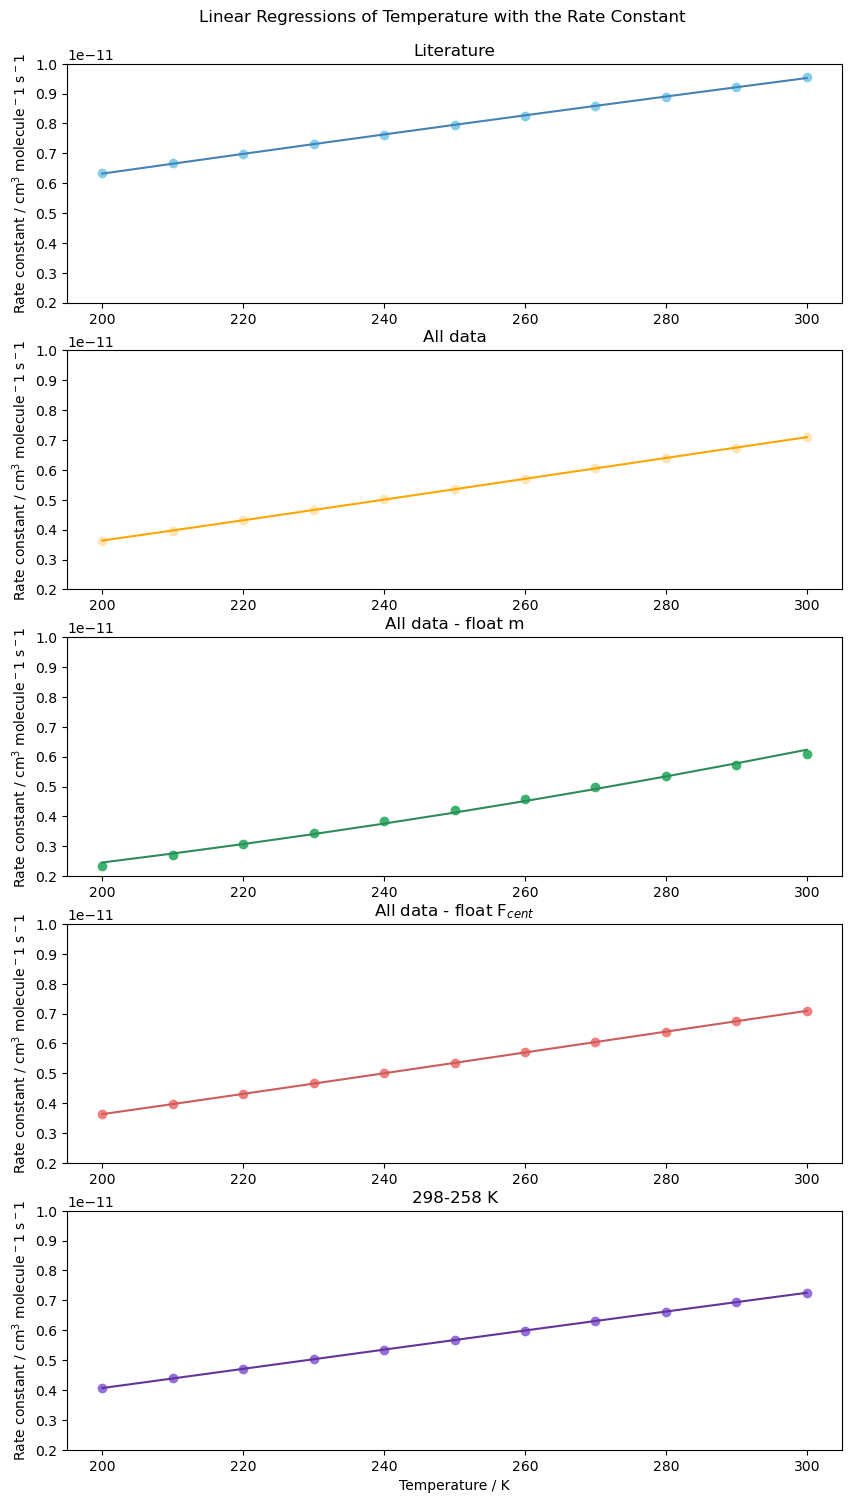

In [39]:
# plotting linear regression
fig,ax = plt.subplots(5,1, figsize = (10,18))

# plotting true against predicted for each temperature
# literature k
ax[0].plot(X, y_litk, color='steelblue')
ax[0].scatter(X, y_pred_litk, color='skyblue')
# all k
ax[1].plot(X, y_allk, color='orange')
ax[1].scatter(X, y_pred_allk, color='moccasin')
# float m k
ax[2].plot(X, y_floatmk, color='seagreen')
ax[2].scatter(X, y_pred_floatmk, color='mediumseagreen')
# float f k
ax[3].plot(X, y_floatfk, color='indianred')
ax[3].scatter(X, y_pred_floatfk, color='lightcoral')
# 298-258 k
ax[4].plot(X, y_298k, color='rebeccapurple')
ax[4].scatter(X, y_pred_298k, color='mediumpurple')

# setting y axis limits
ax[0].set_ylim(2.0e-12,10e-12)
ax[1].set_ylim(2.0e-12,10e-12)
ax[2].set_ylim(2.0e-12,10e-12)
ax[3].set_ylim(2.0e-12,10e-12)
ax[4].set_ylim(2.0e-12,10e-12)

# formatting axis labels
ax[0].set_ylabel('Rate constant / cm$^3$ molecule$^-1$ s$^-1$')
ax[1].set_ylabel('Rate constant / cm$^3$ molecule$^-1$ s$^-1$')
ax[2].set_ylabel('Rate constant / cm$^3$ molecule$^-1$ s$^-1$')
ax[3].set_ylabel('Rate constant / cm$^3$ molecule$^-1$ s$^-1$')
ax[4].set_ylabel('Rate constant / cm$^3$ molecule$^-1$ s$^-1$')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')
ax[4].set_xlabel('Temperature / K')
# formatting titles
ax[0].set_title('Literature')
ax[1].set_title('All data')
ax[2].set_title('All data - float m')
ax[3].set_title('All data - float F$_{cent}$')
ax[4].set_title('298-258 K')

fig.suptitle('Linear Regressions of Temperature with the Rate Constant', y=0.91)

### Analysis of OH Radical Collapse
##### Section 3.3 OH Radical Collapse

In [40]:
# 2005: collapse point, hour before collapse, hour after collapse
coll_allk05, pre_allk05,post_allk05 = analysis.check_collapse(df_allk05, 1e6, temp_dependant_rates)
coll_29805, pre_29805, post_29805 = analysis.check_collapse(df_29805, 1e6, temp_dependant_rates)
coll_floatf05, pre_floatf05, post_floatf05 = analysis.check_collapse(df_floatf05, 1e6, temp_dependant_rates)
coll_floatm05, pre_floatm05, post_floatm05 = analysis.check_collapse(df_floatm05, 1e6, temp_dependant_rates)
coll_lit05, pre_lit05, post_lit05 = analysis.check_collapse(df_lit05, 1e6, temp_dependant_rates)

In [41]:
# 2010: collapse point, hour before collapse, hour after collapse
coll_allk10, pre_allk10,post_allk10 = analysis.check_collapse(df_allk10, 1e6, temp_dependant_rates)
coll_29810, pre_29810, post_29810 = analysis.check_collapse(df_29810, 1e6, temp_dependant_rates)
coll_floatf10, pre_floatf10, post_floatf10 = analysis.check_collapse(df_floatf10, 1e6, temp_dependant_rates)
coll_floatm10, pre_floatm10, post_floatm10 = analysis.check_collapse(df_floatm10, 1e6, temp_dependant_rates)
coll_lit10, pre_lit10, post_lit10 = analysis.check_collapse(df_lit10, 1e6, temp_dependant_rates)

In [42]:
# 2020: collapse point, hour before collapse, hour after collapse
coll_allk20, pre_allk20,post_allk20 = analysis.check_collapse(df_allk20, 1e6, temp_dependant_rates)
coll_29820, pre_29820, post_29820 = analysis.check_collapse(df_29820, 1e6, temp_dependant_rates)
coll_floatf20, pre_floatf20, post_floatf20 = analysis.check_collapse(df_floatf20, 1e6, temp_dependant_rates)
coll_floatm20, pre_floatm20, post_floatm20 = analysis.check_collapse(df_floatm20, 1e6, temp_dependant_rates)
coll_lit20, pre_lit20, post_lit20 = analysis.check_collapse(df_lit20, 1e6, temp_dependant_rates)

In [43]:
# combining collapse points into a single dataframe
coll20 = pd.concat([coll_allk20,coll_29820,coll_floatf20,coll_floatm20,coll_lit20])
coll10 = pd.concat([coll_allk10,coll_29810,coll_floatf10,coll_floatm10,coll_lit10])
coll05 = pd.concat([coll_allk05,coll_29805,coll_floatf05,coll_floatm05,coll_lit05])

##### Number of collapses

In [44]:
print(f"The number of collapses in 2005 was {len(coll_lit05[coll_lit05['Temperature'] == 300])}")
print(f"The number of collapses in 2010 was {len(coll_lit10[coll_lit10['Temperature'] == 300])}")
print(f"The number of collapses in 2020 was {len(coll_lit20[coll_lit20['Temperature'] == 300])}")

The number of collapses in 2005 was 6
The number of collapses in 2010 was 20
The number of collapses in 2020 was 143


#### Pollution composition before, during and after collapse with annual stats
__*Figure 16*__

In [45]:
# finding mean concentrations at each point of collapse
coll_complete05 = analysis.collapse_means(df_lit05, coll_lit05, pre_lit05, post_lit05)
coll_complete10 = analysis.collapse_means(df_lit10, coll_lit10, pre_lit10, post_lit10)
coll_complete20 = analysis.collapse_means(df_lit20, coll_lit20, pre_lit20, post_lit20)

Text(0.5, 0.91, 'The Mean Pollutant Concentrations Before, During and After a Collapse')

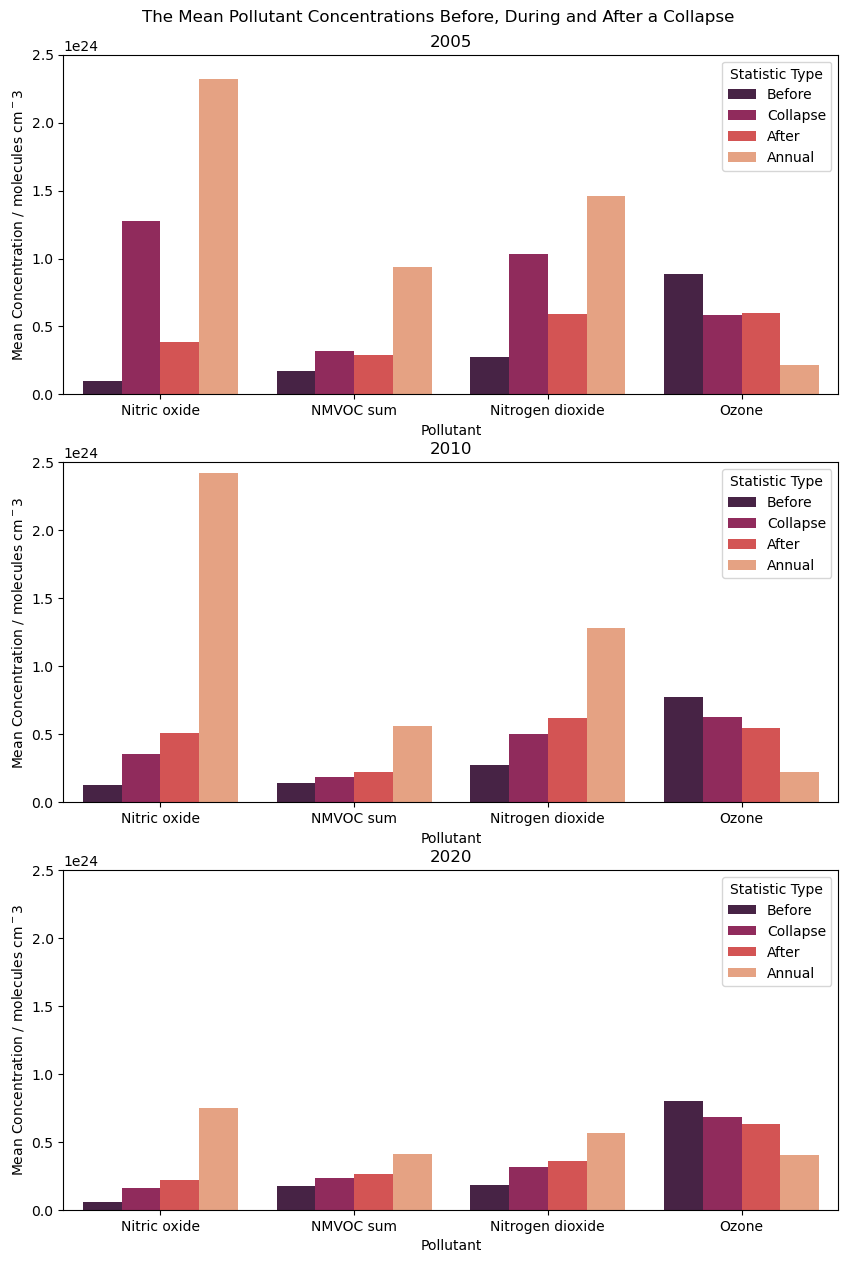

In [46]:
# plotting the concentrations before, during and after
fig,ax = plt.subplots(3, figsize=(10,15))

# bar plot for each year
sns.barplot(data=coll_complete05,x='index',y='mean',hue='Statistic Type', palette='rocket', ax=ax[0])
sns.barplot(data=coll_complete10,x='index',y='mean',hue='Statistic Type', palette='rocket', ax=ax[1])
sns.barplot(data=coll_complete20,x='index',y='mean',hue='Statistic Type', palette='rocket', ax=ax[2])
# set y limits
ax[0].set_ylim(0,2.5e24)
ax[1].set_ylim(0,2.5e24)
ax[2].set_ylim(0,2.5e24)
# setting axis labels
ax[0].set_ylabel('Mean Concentration / molecules cm$^-3$')
ax[1].set_ylabel('Mean Concentration / molecules cm$^-3$')
ax[2].set_ylabel('Mean Concentration / molecules cm$^-3$')
ax[0].set_xlabel('Pollutant')
ax[1].set_xlabel('Pollutant')
ax[2].set_xlabel('Pollutant')
# setting titles
ax[0].set_title('2005')
ax[1].set_title('2010')
ax[2].set_title('2020')

fig.suptitle('The Mean Pollutant Concentrations Before, During and After a Collapse', y=0.91)

#### Pollution composition stats (annual and collapsed)
__*Table 9*__

In [47]:
# 2005: collapsed
coll_lit05[['NMVOC sum','Nitric oxide','NMVOC/NOx ratio']].describe()

,NMVOC sum,Nitric oxide,NMVOC/NOx ratio
count,6.600000e+01,6.600000e+01,66.000000
mean,3.217433e+23,1.274262e+24,0.322160
std,1.451481e+23,2.261389e+24,0.162933
min,1.359321e+23,1.003356e+23,0.061157
25%,2.648005e+23,1.204027e+23,0.216692
50%,2.955899e+23,2.909731e+23,0.330803
75%,3.246631e+23,5.618792e+23,0.419353
max,6.138844e+23,6.281007e+24,0.574153


In [48]:
# 2005: annual
df_lit05[['NMVOC sum','Nitric oxide','NMVOC/NOx ratio']].describe()

,NMVOC sum,Nitric oxide,NMVOC/NOx ratio
count,7.903500e+04,7.880400e+04,78804.000000
mean,9.389651e+23,2.319830e+24,0.294549
std,6.556835e+23,2.029062e+24,0.126889
min,9.898510e+22,2.006711e+22,0.016608
25%,4.637907e+23,6.822819e+23,0.205616
50%,7.823450e+23,1.725772e+24,0.269935
75%,1.211494e+24,3.371275e+24,0.356802
max,6.535923e+24,1.344497e+25,1.759178


In [49]:
# 2010: collapsed
coll_lit10[['NMVOC sum','Nitric oxide','NMVOC/NOx ratio']].describe()

,NMVOC sum,Nitric oxide,NMVOC/NOx ratio
count,2.500000e+02,2.500000e+02,250.000000
mean,1.867904e+23,3.547063e+23,0.273289
std,8.332504e+22,3.239690e+23,0.108759
min,3.306958e+22,6.020134e+22,0.020224
25%,1.462731e+23,1.605369e+23,0.211433
50%,1.882451e+23,2.207382e+23,0.260291
75%,2.075268e+23,4.013423e+23,0.356013
max,4.975934e+23,1.464899e+24,0.484009


In [50]:
# 2010: annual
df_lit10[['NMVOC sum','Nitric oxide','NMVOC/NOx ratio']].describe()

,NMVOC sum,Nitric oxide,NMVOC/NOx ratio
count,7.273200e+04,7.213800e+04,72138.000000
mean,5.563394e+23,2.422258e+24,0.201648
std,4.174211e+23,2.321168e+24,0.122784
min,2.307938e+21,2.006711e+22,0.000537
25%,2.868332e+23,6.020134e+23,0.118707
50%,4.566085e+23,1.605369e+24,0.177207
75%,7.205150e+23,3.531812e+24,0.257122
max,5.466806e+24,1.575268e+25,1.290322


In [51]:
# 2020: collapsed
coll_lit20[['NMVOC sum','Nitric oxide','NMVOC/NOx ratio']].describe()

,NMVOC sum,Nitric oxide,NMVOC/NOx ratio
count,1.635000e+03,1.635000e+03,1635.000000
mean,2.341942e+23,1.586555e+23,0.689494
std,1.271813e+23,1.818919e+23,0.413830
min,3.712510e+22,2.179690e+21,0.111668
25%,1.587751e+23,4.008286e+22,0.403328
50%,2.033456e+23,9.744570e+22,0.574275
75%,2.613479e+23,1.907963e+23,0.920165
max,9.338592e+23,8.160482e+23,2.411231


In [52]:
# 2020: annual
df_lit20[['NMVOC sum','Nitric oxide','NMVOC/NOx ratio']].describe()

,NMVOC sum,Nitric oxide,NMVOC/NOx ratio
count,7.726400e+04,7.646100e+04,76461.000000
mean,4.119038e+23,7.450371e+23,0.470033
std,2.785286e+23,9.055247e+23,0.328002
min,1.249691e+20,0.000000e+00,0.000072
25%,2.405232e+23,1.441264e+23,0.242759
50%,3.418809e+23,3.945770e+23,0.379226
75%,5.020665e+23,1.011992e+24,0.589912
max,2.889384e+24,7.357649e+24,2.945306


#### Variability of NMVOC and NOx emissions
__*Figure 17 and 18*__

Text(0.5, 0.98, 'Box plots of the NMVOC for 2005, 2010 and 2020')

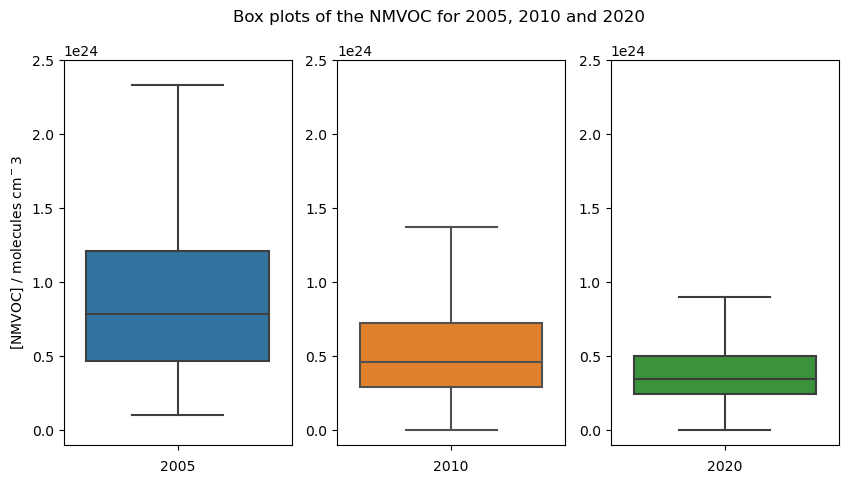

In [53]:
# boxplot of NMVOC concentration
fig,ax = plt.subplots(1,3, figsize=(10,5))

sns.boxplot(y=df_lit05['NMVOC sum'],showfliers=False, color='tab:blue',ax=ax[0])
sns.boxplot(y=df_lit10['NMVOC sum'],showfliers=False, color='tab:orange',ax=ax[1])
sns.boxplot(y=df_lit20['NMVOC sum'],showfliers=False, color='tab:green',ax=ax[2])

# formatting y axis
ax[0].set_ylabel('[NMVOC] / molecules cm$^-3$')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
# formatting x axis
ax[0].set_xlabel('2005')
ax[1].set_xlabel('2010')
ax[2].set_xlabel('2020')

# setting y limits for comparability
ax[0].set_ylim(-0.1e24,2.5e24)
ax[1].set_ylim(-0.1e24,2.5e24)
ax[2].set_ylim(-0.1e24,2.5e24)

fig.suptitle('Box plots of the NMVOC for 2005, 2010 and 2020')

Text(0.5, 0.98, 'Box plots of the NOx concentration for 2005, 2010 and 2020')

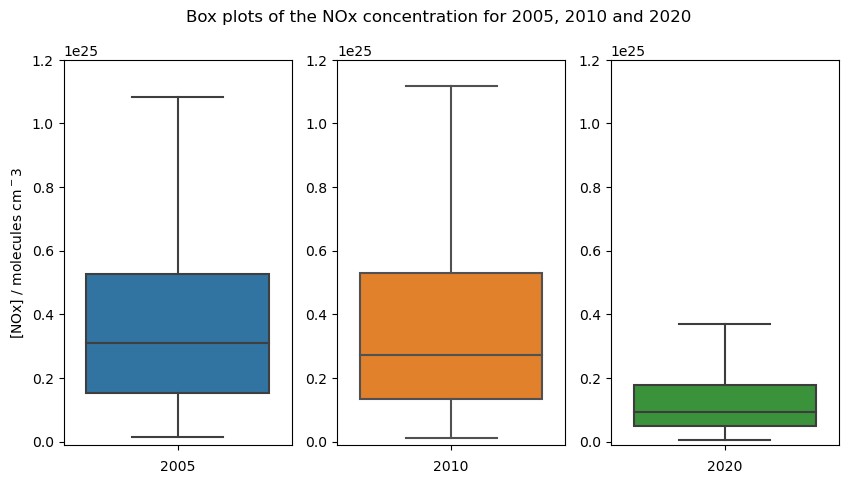

In [54]:
# boxplot of NOx concentration
fig,ax = plt.subplots(1,3, figsize=(10,5))

sns.boxplot(y=df_lit05['NOx'],showfliers=False, color='tab:blue',ax=ax[0])
sns.boxplot(y=df_lit10['NOx'],showfliers=False, color='tab:orange',ax=ax[1])
sns.boxplot(y=df_lit20['NOx'],showfliers=False, color='tab:green',ax=ax[2])

# formatting y axis
ax[0].set_ylabel('[NOx] / molecules cm$^-3$')
ax[1].set_ylabel('')
ax[2].set_ylabel('')
# foratting x axis
ax[0].set_xlabel('2005')
ax[1].set_xlabel('2010')
ax[2].set_xlabel('2020')

# setting y limits for comparability
ax[0].set_ylim(-0.01e25,1.2e25)
ax[1].set_ylim(-0.01e25,1.2e25)
ax[2].set_ylim(-0.01e25,1.2e25)

fig.suptitle('Box plots of the NOx concentration for 2005, 2010 and 2020')

#### Points of Collapse Over the Years
__*Figure 19*__

Text(0.5, 0.92, 'The Points of Collapse Against the OH Concentration')

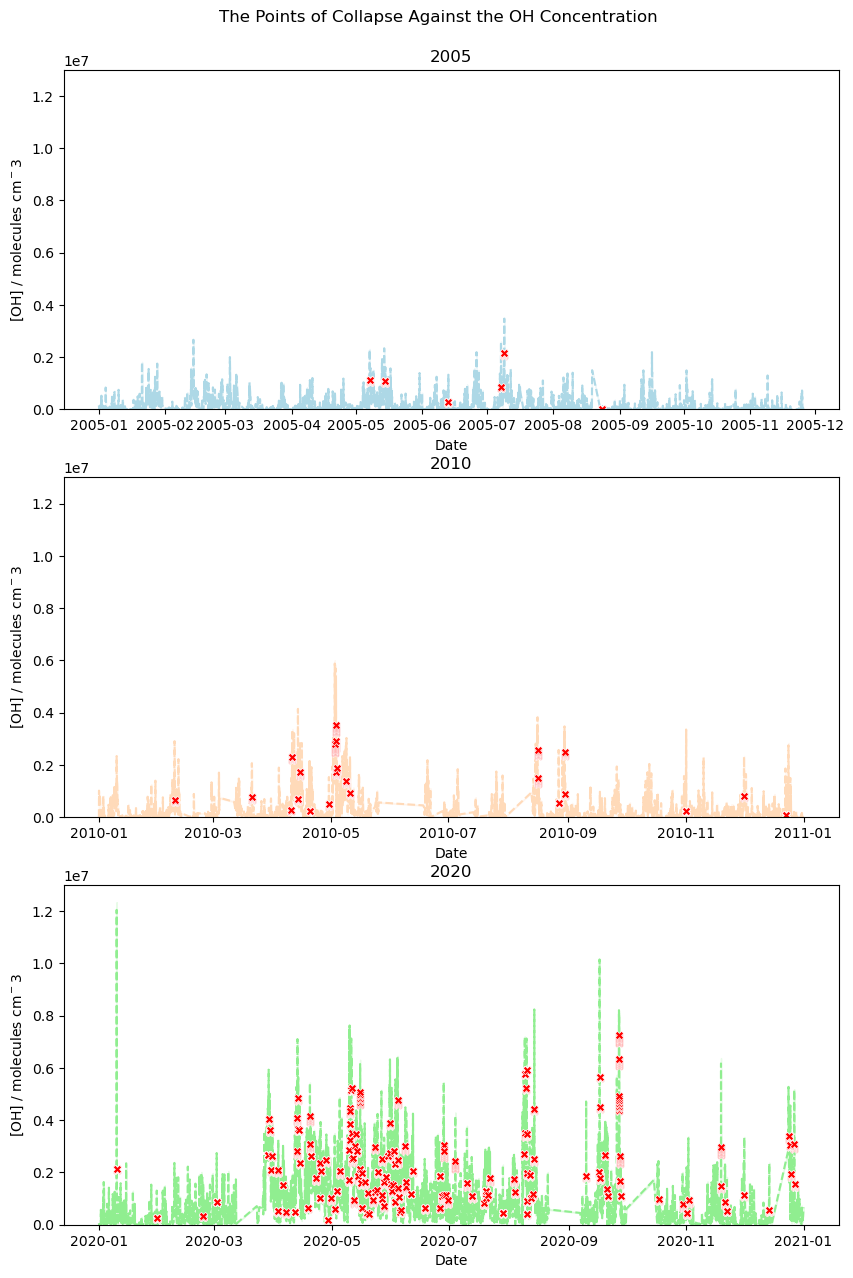

In [76]:
# plot of the point of collapse against the OH concentration over the year
fig,ax = plt.subplots(3, figsize = (10,15))
# 2005
# scatter of collapse concentrations
sns.scatterplot(data=coll_lit05, x= 'Date_Time', y='OH concentration', color = 'red', marker = 'X', zorder = 2, ax=ax[0])
# lineplot of OH concentration
sns.lineplot(data=df_lit05, x = 'Date_Time', y = 'OH concentration', linestyle = 'dashed', color = 'lightblue', zorder = 1, ax=ax[0])
# 2010
# scatter of collapse concentrations
sns.scatterplot(data=coll_lit10, x= 'Date_Time', y='OH concentration', color = 'red', marker = 'X', zorder = 2, ax=ax[1])
# lineplot of OH concentration
sns.lineplot(data=df_lit10, x = 'Date_Time', y = 'OH concentration', linestyle = 'dashed', color = 'peachpuff', zorder = 1, ax=ax[1])
# 2020
# scatter of collapse concentrations
sns.scatterplot(data=coll_lit20, x= 'Date_Time', y='OH concentration', color = 'red', marker = 'X', zorder = 2, ax=ax[2])
# lineplot of OH concentration
sns.lineplot(data=df_lit20, x = 'Date_Time', y = 'OH concentration', linestyle = 'dashed', color = 'lightgreen', zorder = 1, ax=ax[2])

# formatting labels
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')
ax[2].set_xlabel('Date')
ax[0].set_ylabel('[OH] / molecules cm$^-3$')
ax[1].set_ylabel('[OH] / molecules cm$^-3$')
ax[2].set_ylabel('[OH] / molecules cm$^-3$')
# formatting titles
ax[0].set_title('2005')
ax[1].set_title('2010')
ax[2].set_title('2020')
# setting y limits
ax[0].set_ylim(0.0e7, 1.3e7)
ax[1].set_ylim(0.0e7, 1.3e7)
ax[2].set_ylim(0.0e7, 1.3e7)

fig.suptitle('The Points of Collapse Against the OH Concentration', y=0.92)

### Analysis of Impact of New Rate Constants on OH Radical Collapse
##### Section 3.4 Impact of the New OH-NO Rate Constants on OH Radical Collapse

In [56]:
# Number of collapses
#2005
no_2005 = analysis.number_of_collapses(coll_allk05,coll_29805,coll_floatf05,coll_floatm05,coll_lit05)
# 2010
no_2010 = analysis.number_of_collapses(coll_allk10,coll_29810,coll_floatf10,coll_floatm10,coll_lit10)
# 2020
no_2020 = analysis.number_of_collapses(coll_allk20,coll_29820,coll_floatf20,coll_floatm20,coll_lit20)

#### The Number of Collapses in OH for Each Rate Constant
__*Figure 20*__

Text(0.5, 0.91, 'The Number of Collapses in OH to a Significance of 1x10$^6$')

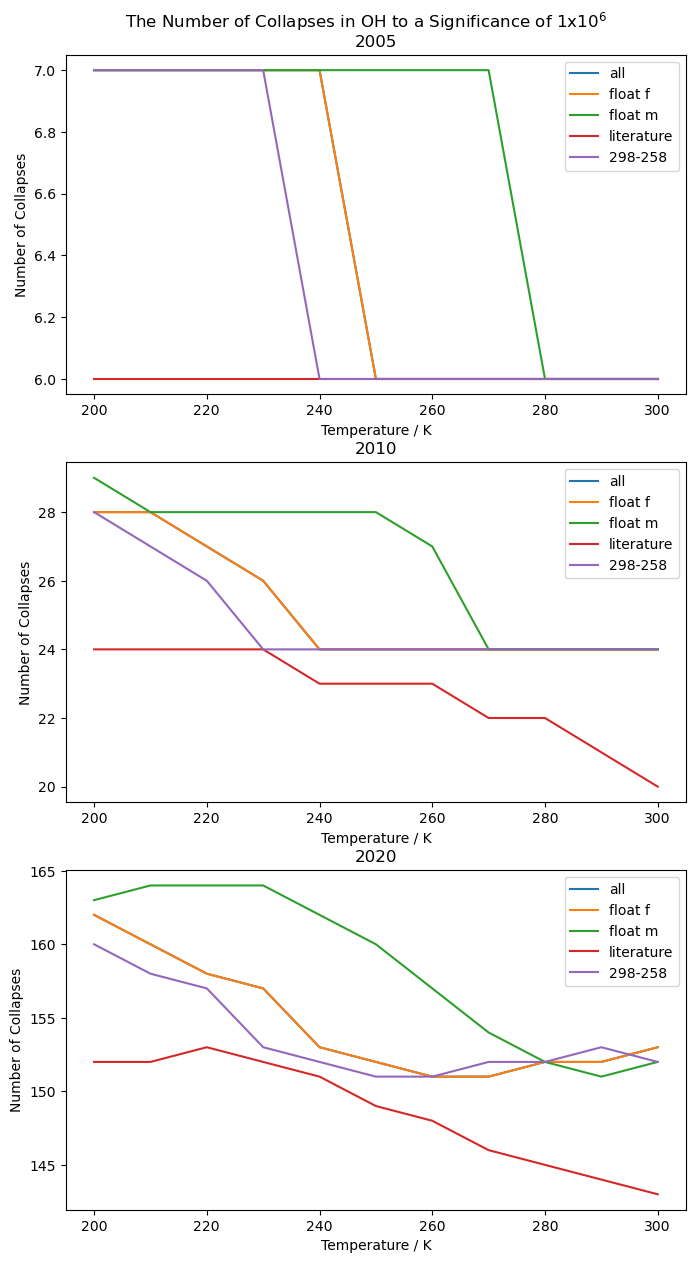

In [57]:
# plotting the number of collapses per rate constatnt
fig,ax = plt.subplots(3,1, figsize=(8,15))

# 2005
sns.lineplot(data=no_2005,x='Temperature',y='all k', label = 'all',ax=ax[0])
sns.lineplot(data=no_2005,x='Temperature',y='float f', label = 'float f',ax=ax[0])
sns.lineplot(data=no_2005,x='Temperature',y='float m', label = 'float m',ax=ax[0])
sns.lineplot(data=no_2005,x='Temperature',y='lit', label = 'literature',ax=ax[0])
sns.lineplot(data=no_2005,x='Temperature',y='298', label = '298-258',ax=ax[0])
# 2010
sns.lineplot(data=no_2010,x='Temperature',y='all k', label = 'all',ax=ax[1])
sns.lineplot(data=no_2010,x='Temperature',y='float f', label = 'float f',ax=ax[1])
sns.lineplot(data=no_2010,x='Temperature',y='float m', label = 'float m',ax=ax[1])
sns.lineplot(data=no_2010,x='Temperature',y='lit', label = 'literature',ax=ax[1])
sns.lineplot(data=no_2010,x='Temperature',y='298', label = '298-258',ax=ax[1])
# 2020
sns.lineplot(data=no_2020,x='Temperature',y='all k', label = 'all',ax=ax[2])
sns.lineplot(data=no_2020,x='Temperature',y='float f', label = 'float f',ax=ax[2])
sns.lineplot(data=no_2020,x='Temperature',y='float m', label = 'float m',ax=ax[2])
sns.lineplot(data=no_2020,x='Temperature',y='lit', label = 'literature',ax=ax[2])
sns.lineplot(data=no_2020,x='Temperature',y='298', label = '298-258',ax=ax[2])
# formatting
ax[0].set_title('2005')
ax[1].set_title('2010')
ax[2].set_title('2020')
# formatting axes
ax[0].set_ylabel('Number of Collapses')
ax[1].set_ylabel('Number of Collapses')
ax[2].set_ylabel('Number of Collapses')
ax[0].set_xlabel('Temperature / K')
ax[1].set_xlabel('Temperature / K')
ax[2].set_xlabel('Temperature / K')

fig.suptitle('The Number of Collapses in OH to a Significance of 1x10$^6$',y=0.91)

#### Difference in the Number of Collapses Compared to Literature for Each Temperature
__*Figure 21*__

In [58]:
# formatting dataframe for heatmap plotting
heatmap05 = (no_2005[['Temperature','all k difference','float m difference','float f difference',
                     '298 difference']]).set_index('Temperature')
heatmap10 = (no_2010[['Temperature','all k difference','float m difference','float f difference',
                     '298 difference']]).set_index('Temperature')
heatmap20 = (no_2020[['Temperature','all k difference','float m difference','float f difference',
                     '298 difference']]).set_index('Temperature')

In [59]:
# list of rate types for graph formatting
rate_list = ['all data','float m','float f','298-258']

Text(0.5, 0.94, 'A Heatmap of the Difference with Literature in the Number of Collapse Points per Year')

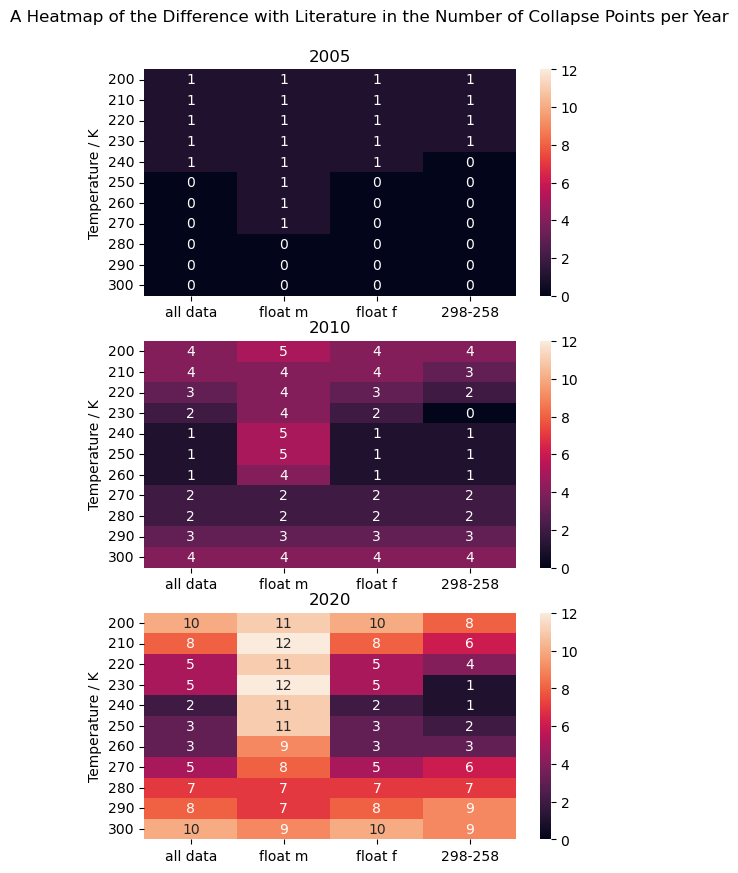

In [60]:
# heatmap of the difference with literature per temperature
# sharey: only one y axis shown
fig,ax = plt.subplots(3,1,figsize=(6,10),sharey=True)
# 2005
sns.heatmap(heatmap05,vmin=0,vmax=12, annot=True,ax=ax[0])
# 2010
sns.heatmap(heatmap10,vmin=0,vmax=12, annot=True,ax=ax[1])
# 2020
sns.heatmap(heatmap20,vmin=0,vmax=12, annot=True,ax=ax[2])

x = np.arange(len(rate_list)) 

# formatting titles
ax[0].set_title('2005')
ax[1].set_title('2010')
ax[2].set_title('2020')
# setting y axis labels
ax[0].set_ylabel('Temperature / K')
ax[1].set_ylabel('Temperature / K')
ax[2].set_ylabel('Temperature / K')
# formatting x axis tickx
ax[0].set_xticks(x+0.5,rate_list,rotation=360)
ax[1].set_xticks(x+0.5,rate_list,rotation=360)
ax[2].set_xticks(x+0.5,rate_list,rotation=360)

fig.suptitle('A Heatmap of the Difference with Literature in the Number of Collapse Points per Year', y=0.94)

#### Scaled Magnitude of Collapse
__*Figure 22*__

In [61]:
# 2005 mean per rate constant type
allk05_mean = float(df_allk05['OH concentration'].mean())
floatf05_mean = float(df_floatf05['OH concentration'].mean())                              
floatm05_mean = float(df_floatm05['OH concentration'].mean())                              
k29805_mean = float(df_29805['OH concentration'].mean())
litk05_mean = float(df_lit05['OH concentration'].mean())     

In [62]:
# 2010 mean per rate constant type
allk10_mean = float(df_allk10['OH concentration'].mean())
floatf10_mean = float(df_floatf10['OH concentration'].mean())                              
floatm10_mean = float(df_floatm10['OH concentration'].mean())                              
k29810_mean = float(df_29810['OH concentration'].mean())
litk10_mean = float(df_lit10['OH concentration'].mean())                              

In [63]:
# 2020 mean per rate constant type
allk20_mean = float(df_allk20['OH concentration'].mean())
floatf20_mean = float(df_floatf20['OH concentration'].mean())                              
floatm20_mean = float(df_floatm20['OH concentration'].mean())                              
k29820_mean = float(df_29820['OH concentration'].mean())
litk20_mean = float(df_lit20['OH concentration'].mean())                              

In [64]:
# scaling the mean to annual average for literature
coll_lit20['difference_scaled'] = coll_lit20['difference']/litk20_mean
coll_lit10['difference_scaled'] = coll_lit10['difference']/litk10_mean
coll_lit05['difference_scaled'] = coll_lit05['difference']/litk05_mean

In [65]:
# scaling the mean to annual average for all k
coll_allk20['difference_scaled'] = coll_allk20['difference']/allk20_mean
coll_allk10['difference_scaled'] = coll_allk10['difference']/allk10_mean
coll_allk05['difference_scaled'] = coll_allk05['difference']/allk05_mean

In [66]:
# scaling the mean to annual average for float m
coll_floatm20['difference_scaled'] = coll_floatm20['difference']/floatm20_mean
coll_floatm10['difference_scaled'] = coll_floatm10['difference']/floatm10_mean
coll_floatm05['difference_scaled'] = coll_floatm05['difference']/floatm05_mean

In [67]:
# scaling the mean to annual average for float f
coll_floatf20['difference_scaled'] = coll_floatf20['difference']/floatf20_mean
coll_floatf10['difference_scaled'] = coll_floatf10['difference']/floatf10_mean
coll_floatf05['difference_scaled'] = coll_floatf05['difference']/floatf05_mean                             

In [68]:
# scaling the mean to annual average for 298-258 k
coll_29820['difference_scaled'] = coll_29820['difference']/k29820_mean
coll_29810['difference_scaled'] = coll_29810['difference']/k29810_mean
coll_29805['difference_scaled'] = coll_29805['difference']/k29805_mean

Text(0.5, 0.91, 'The Magnitude of Collapse of OH Radicals')

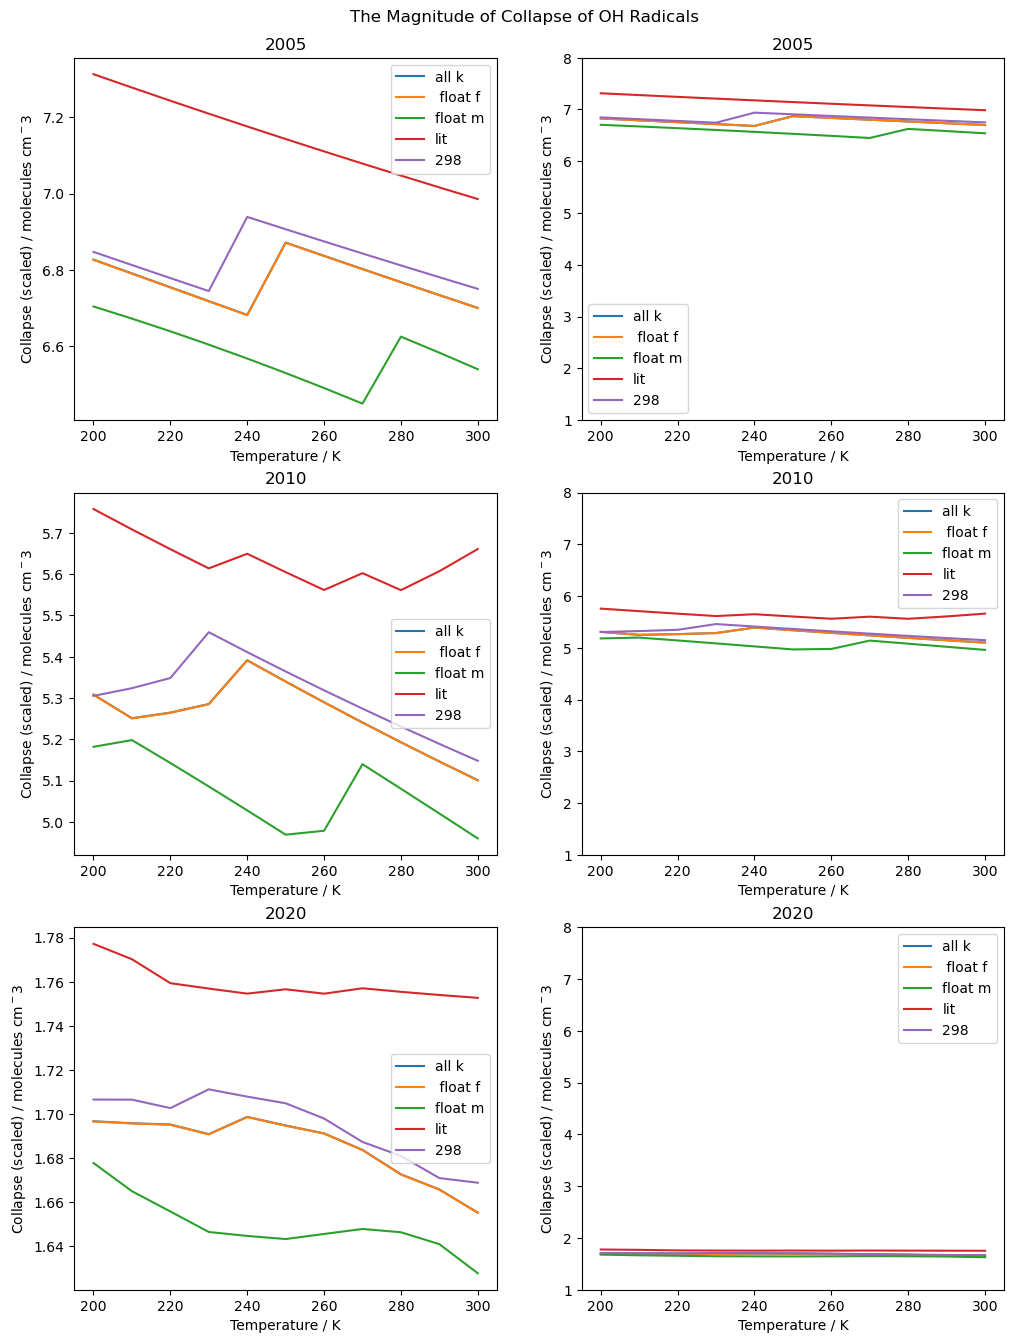

In [69]:
# plot of the scaled mean difference with literature for each of the rate constants and years studied
# plotting twice to allow for a scaled and non-scaled axis for comparison
fig,ax = plt.subplots(3,2, figsize=(12,16))

# 2005
sns.lineplot(data=coll_allk05,x='Temperature',y='difference_scaled', errorbar=None, label = 'all k',ax=ax[0,0])
sns.lineplot(data=coll_floatf05,x='Temperature',y='difference_scaled', errorbar=None, label = ' float f',ax=ax[0,0])
sns.lineplot(data=coll_floatm05,x='Temperature',y='difference_scaled', errorbar=None, label = 'float m',ax=ax[0,0])
sns.lineplot(data=coll_lit05,x='Temperature',y='difference_scaled', errorbar=None, label = 'lit',ax=ax[0,0])
sns.lineplot(data=coll_29805,x='Temperature',y='difference_scaled', errorbar=None, label = '298',ax=ax[0,0])
sns.lineplot(data=coll_allk05,x='Temperature',y='difference_scaled', errorbar=None, label = 'all k',ax=ax[0,1])
sns.lineplot(data=coll_floatf05,x='Temperature',y='difference_scaled', errorbar=None, label = ' float f',ax=ax[0,1])
sns.lineplot(data=coll_floatm05,x='Temperature',y='difference_scaled', errorbar=None, label = 'float m',ax=ax[0,1])
sns.lineplot(data=coll_lit05,x='Temperature',y='difference_scaled', errorbar=None, label = 'lit',ax=ax[0,1])
sns.lineplot(data=coll_29805,x='Temperature',y='difference_scaled', errorbar=None, label = '298',ax=ax[0,1])
#2010
sns.lineplot(data=coll_allk10,x='Temperature',y='difference_scaled', errorbar=None, label = 'all k',ax=ax[1,0])
sns.lineplot(data=coll_floatf10,x='Temperature',y='difference_scaled', errorbar=None, label = ' float f',ax=ax[1,0])
sns.lineplot(data=coll_floatm10,x='Temperature',y='difference_scaled', errorbar=None, label = 'float m',ax=ax[1,0])
sns.lineplot(data=coll_lit10,x='Temperature',y='difference_scaled', errorbar=None, label = 'lit',ax=ax[1,0])
sns.lineplot(data=coll_29810,x='Temperature',y='difference_scaled', errorbar=None, label = '298',ax=ax[1,0])
sns.lineplot(data=coll_allk10,x='Temperature',y='difference_scaled', errorbar=None, label = 'all k',ax=ax[1,1])
sns.lineplot(data=coll_floatf10,x='Temperature',y='difference_scaled', errorbar=None, label = ' float f',ax=ax[1,1])
sns.lineplot(data=coll_floatm10,x='Temperature',y='difference_scaled', errorbar=None, label = 'float m',ax=ax[1,1])
sns.lineplot(data=coll_lit10,x='Temperature',y='difference_scaled', errorbar=None, label = 'lit',ax=ax[1,1])
sns.lineplot(data=coll_29810,x='Temperature',y='difference_scaled', errorbar=None, label = '298',ax=ax[1,1])
#2020
sns.lineplot(data=coll_allk20,x='Temperature',y='difference_scaled', errorbar=None, label = 'all k',ax=ax[2,0])
sns.lineplot(data=coll_floatf20,x='Temperature',y='difference_scaled', errorbar=None, label = ' float f',ax=ax[2,0])
sns.lineplot(data=coll_floatm20,x='Temperature',y='difference_scaled', errorbar=None, label = 'float m',ax=ax[2,0])
sns.lineplot(data=coll_lit20,x='Temperature',y='difference_scaled', errorbar=None, label = 'lit',ax=ax[2,0])
sns.lineplot(data=coll_29820,x='Temperature',y='difference_scaled', errorbar=None, label = '298',ax=ax[2,0])
sns.lineplot(data=coll_allk20,x='Temperature',y='difference_scaled', errorbar=None, label = 'all k',ax=ax[2,1])
sns.lineplot(data=coll_floatf20,x='Temperature',y='difference_scaled', errorbar=None, label = ' float f',ax=ax[2,1])
sns.lineplot(data=coll_floatm20,x='Temperature',y='difference_scaled', errorbar=None, label = 'float m',ax=ax[2,1])
sns.lineplot(data=coll_lit20,x='Temperature',y='difference_scaled', errorbar=None, label = 'lit',ax=ax[2,1])
sns.lineplot(data=coll_29820,x='Temperature',y='difference_scaled', errorbar=None, label = '298',ax=ax[2,1])

# formatting titles
ax[0,0].set_title('2005')
ax[1,0].set_title('2010')
ax[2,0].set_title('2020')
ax[0,1].set_title('2005')
ax[1,1].set_title('2010')
ax[2,1].set_title('2020')
# formatting y labels
ax[0,0].set_ylabel('Collapse (scaled) / molecules cm$^-3$')
ax[1,0].set_ylabel('Collapse (scaled) / molecules cm$^-3$')
ax[2,0].set_ylabel('Collapse (scaled) / molecules cm$^-3$')
ax[0,1].set_ylabel('Collapse (scaled) / molecules cm$^-3$')
ax[1,1].set_ylabel('Collapse (scaled) / molecules cm$^-3$')
ax[2,1].set_ylabel('Collapse (scaled) / molecules cm$^-3$')
# setting y limits (scaled (Right))
ax[0,1].set_ylim(1,8)
ax[1,1].set_ylim(1,8)
ax[2,1].set_ylim(1,8)
# formatting x label
ax[0,0].set_xlabel('Temperature / K')
ax[1,0].set_xlabel('Temperature / K')
ax[2,0].set_xlabel('Temperature / K')
ax[0,1].set_xlabel('Temperature / K')
ax[1,1].set_xlabel('Temperature / K')
ax[2,1].set_xlabel('Temperature / K')

fig.suptitle('The Magnitude of Collapse of OH Radicals', y = 0.91)

#### Comparison with 8 hour and 1 hour average DEFRA AQ limits

In [71]:
AQ_means_05 = analysis.AQ_limits(coll_lit05, df_lit05)
AQ_means_10 = analysis.AQ_limits(coll_lit10, df_lit10)
AQ_means_20 = analysis.AQ_limits(coll_lit20, df_lit20)

In [72]:
AQ_means_05

,mean value / molecules cm-3
Ozone,4.976630e+23
Carbon monoxide,1.076705e+22
Nitrogen dioxide,1.034114e+24


In [74]:
AQ_means_10

,mean value / molecules cm-3
Ozone,5.663709e+23
Carbon monoxide,7.402131e+21
Nitrogen dioxide,4.996732e+23


In [75]:
AQ_means_20

,mean value / molecules cm-3
Ozone,6.086615e+23
Carbon monoxide,4.271069e+21
Nitrogen dioxide,3.143319e+23
